In [71]:
password = None

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import getpass
import pandas as pd
import numpy as np

from utils import load_json_benchmarks, filter_results, plot_comparison

repetitions = 10

In [73]:
if password is None:
    password = getpass.getpass()

In [82]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


```
../../cmake-build-release/benchmark/comparison/benchmark-s3rvac-cpp-bencoding \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-s3rvac-cpp-bencoding.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-jimporter-bencode \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-jimporter-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-jimporter-bencode-boost \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-jimporter-bencode-boost.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-arvidn-libtorrent \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-arvidn-libtorrent.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-rakshasa-libtorrent \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-rakshasa-libtorrent.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-kriben-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-kriben-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-theanti9-cppbencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-theanti9-cppbencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-outputenable-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-outputenable-bencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-aetf-qbencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-aetf-qbencode.json"
```

```
../../cmake-build-release/benchmark/comparison/benchmark-irajul-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-irajul-bencode.json"
```

```
../../cmake-build-release-sse/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode-sse41.json"
```

```
../../cmake-build-release-avx/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode-avx2.json"
```

In [75]:
# reenable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g powersave

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [52]:
libraries = [
    ("benchmark-jimporter-bencode.json",        "jimporter/bencode"),
    ("benchmark-jimporter-bencode-boost.json",  "jimporter/bencode (boost)"),
    ("benchmark-arvidn-libtorrent.json",        "arvidn/libtorrent"),
    ("benchmark-s3rvac-cpp-bencoding.json",     "s3rvac/cpp-bencoding"),
    ("benchmark-rakshasa-libtorrent.json",      "rakshasa/libtorrent"),
    ("benchmark-kriben-bencode.json",           "kriben/bencode"),
    ("benchmark-theanti9-cppbencode.json",      "theanti9/cppbencode"),
    ("benchmark-outputenable-bencode.json",     "outputenable/bencode"),
    ("benchmark-aetf-qbencode.json",            "Aetf/QBencode"),
    # ("benchmark-irajul-bencode.json",           "iRajul/bencode"),    // Invalid parser
    ("benchmark-fbdtemme-bencode.json",         "fbdtemme/bencode"),
]

df = pd.concat([
    filter_results(load_json_benchmarks(result), lib_name) for result, lib_name in libraries
])

[autoreload of utils failed: Traceback (most recent call last):
  File "/usr/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib64/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib64/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 786, in exec_module
  File "<frozen importlib._bootstrap_external>", line 923, in get_code
  File "<frozen importlib._bootstrap_external>", line 853, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/fbdtemme/Documents/project/torrent/bencode/benchmark/plots/utils.py", line 88
    ax.set_xt

In [53]:
grouped_df = df.groupby(["library", "test_type", "test_file"])["bytes_per_second"]
results = pd.DataFrame({"mean" : grouped_df.mean(), "stddev": grouped_df.std()})


In [54]:
results_value = results.loc[results.index.get_level_values("test_type") == "decode_value", :]
results_value = results_value.droplevel(1)

drop_list = ["arvidn/libtorrent", "outputenable/bencode"]

for lib_name in drop_list:
    results_value = results_value.drop(index=lib_name)

results_value[~np.isfinite(results_value)] = 0

In [55]:
drop_list = ["s3rvac/cpp-bencoding", "kriben/bencode", "rakshasa/libtorrent", "theanti9/cppbencode", "Aetf/QBencode"]

results_view = results.loc[results.index.get_level_values("test_type") == "decode_view", :]
results_view = results_view.droplevel(1)
for lib_name in drop_list:
    results_view = results_view.drop(index=lib_name)

results_view

mean        stddev
library                   test_file                             
arvidn/libtorrent         camelyon17  7.046501e+10  1.359306e+09
                          covid       1.536461e+09  1.522361e+07
                          integers    6.538771e+08  8.199845e+06
                          pneumonia   1.057381e+09  2.628176e+07
                          ubuntu      1.430704e+11  2.934328e+09
fbdtemme/bencode          camelyon17  6.601284e+10  1.140725e+09
                          covid       1.496616e+09  2.206245e+07
                          integers    1.018386e+09  2.915830e+07
                          pneumonia   8.847486e+08  1.730413e+07
                          ubuntu      1.701805e+11  1.887819e+09
jimporter/bencode         camelyon17  2.345377e+10  4.717456e+08
                          covid       7.704596e+08  1.074389e+07
                          integers    6.986161e+08  1.926345e+07
                          pneumonia   3.075365e+08  7.115363e+06
                          ubuntu      1.059434e+11  1.232972e+09
jimporter/bencode (boost) camelyon17  2.412729e+10  1.161374e+09
                          covid       8.266837e+08  1.055554e+07
                          integers    7.521034e+08  5.711328e+07
                          pneumonia   2.880714e+08  2.385024e+07
                          ubuntu      1.133696e+11  1.464186e+09
outputenable/bencode      camelyon17  6.014462e+10  1.369178e+09
                          covid       1.402155e+09  4.974857e+07
                          integers    5.941066e+08  7.438008e+06
                          pneumonia   9.596517e+08  4.568384e+07
                          ubuntu      1.402744e+11  5.312381e+09

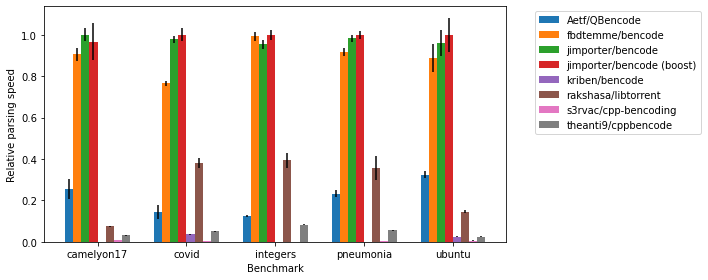

In [59]:
ax = plot_comparison(results_value, figsize=(10, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
ax.figure.savefig("../../docs/images/benchmark-decoding-value.svg")

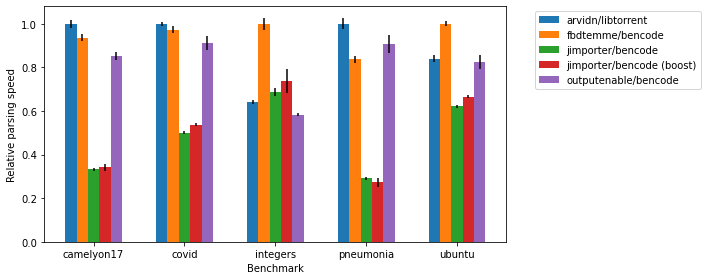

In [60]:
ax = plot_comparison(results_view, figsize=(10, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
ax.figure.savefig("../../docs/images/benchmark-decoding-view.svg")